In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
from sklearn.linear_model import LinearRegression

## Assignment 1

In [2]:
data = pd.read_csv('ds-boot-2.csv', sep='\t')
data.head()

,id,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p24,p25,p26,p27,p28,y1,y2,y3,y4,y5
0,11,6.48148,3.0,5.0,7.75000,0.0,7.16667,8.16667,9.66667,6.16667,...,1.66667,3.16667,0.0,0.00000,0.0,1.0,5.00,7.44,1.18,4.38
1,12,5.74074,4.0,8.0,7.33333,8.0,8.83333,9.75000,9.66667,9.00000,...,2.50000,5.50000,5.0,8.66667,8.0,4.5,4.25,8.93,2.00,6.03
2,25,7.59259,7.0,8.0,7.66667,8.0,9.66667,9.50000,6.16667,9.66667,...,3.50000,3.50000,9.0,6.50000,7.0,7.5,11.00,8.97,2.00,9.12
3,31,5.96297,4.0,8.0,9.33333,10.0,9.33333,7.00000,8.50000,9.66667,...,0.00000,0.00000,0.0,0.00000,0.0,4.0,6.25,8.93,1.82,6.41
4,48,5.44444,1.0,3.5,6.41667,9.0,8.50000,7.08333,6.33333,9.00000,...,0.00000,0.00000,0.0,0.00000,0.0,0.0,3.00,8.08,1.36,3.67


In [3]:
def bootstrap(X, B=1000, s=np.mean):
    gen = np.random.choice(X, size=(B, len(X)))
    estimations = s(gen, axis=1)
    est = estimations.mean()
    error = (((estimations - est) ** 2).sum() / (B - 1)) ** 0.5
    conf_int = np.percentile(estimations, [2.5, 97.5])
    return est, error, conf_int

print(bootstrap(data['y1'], s=np.mean))
print(bootstrap(data['y1'], s=np.median))

(4.0291375, 0.45575328951599969, array([ 3.1996875,  4.9753125]))
(4.0267499999999998, 0.56372841619633407, array([ 3.,  6.]))


In [4]:
targets = ['y1', 'y2', 'y3', 'y4', 'y5']
for label in targets:
    # output - estimation, error, confidence interval
    print(label, 'mean:', bootstrap(data[label], s=np.mean))
    print(label, 'meadian:', bootstrap(data[label], s=np.median), '\n')

y1 mean: (4.0204500000000003, 0.4561460750042049, array([ 3.1621875,  4.9128125]))
y1 meadian: (4.0385, 0.60890353383234153, array([ 3.,  6.])) 

y2 mean: (5.5239937500000007, 0.52537059256582908, array([ 4.46234375,  6.525     ]))
y2 meadian: (6.1628749999999997, 0.68860750044177177, array([ 4.625   ,  7.253125])) 

y3 mean: (7.3038834999999995, 0.47957199757033731, array([ 6.23870625,  8.197325  ]))
y3 meadian: (8.3066250000000004, 0.2717363152028085, array([ 7.995,  8.92 ])) 

y4 mean: (1.5223057499999999, 0.11304906864436724, array([ 1.28595625,  1.73200625]))
y4 meadian: (1.85995, 0.13452600025550729, array([ 1.64,  2.  ])) 

y5 mean: (5.65305825, 0.43672495446824744, array([ 4.76916875,  6.4617875 ]))
y5 meadian: (6.1874849999999997, 0.4381629109264174, array([ 5.215,  7.29 ])) 



In [5]:
# Linear Reagression of an initial sample
features = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6']
for label in targets:
    model = LinearRegression()
    model.fit(data[features], data[label])
    print(label, model.coef_)

y1 [ 0.19590832  0.29677494 -0.18401943  0.02210887  0.13189801  0.28986106]
y2 [ 0.12744323  0.18071353  0.03383592  0.10825791 -0.05377676  0.57520423]
y3 [ 0.15867643  0.01838332  0.12772208  0.29122447  0.17922699  0.23654851]
y4 [-0.00486422  0.00423981  0.11801823  0.02819031  0.06902863  0.00098964]
y5 [ 0.152759    0.16444265  0.01372641  0.1348942   0.10091446  0.34552193]


In [6]:
def coeffs_bootstrap(X, Y, B=1000, model_class=LinearRegression):
    ''' returns estimations of coefficients (with intercept) and 95% confidence intervals'''
    n = X.shape[0]
    coeffs = []
    for b in range(B):
        model = model_class()
        idx = np.random.randint(n, size=n)
        model.fit(X.as_matrix()[idx, :], Y.as_matrix()[idx])
        coeffs.append(np.append(model.coef_, model.intercept_))
    coeffs = np.array(coeffs)
    conf_int = np.percentile(coeffs, [2.5, 97.5], axis=0)
    return coeffs.mean(axis=0), conf_int

features = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6']
# features = ['p{}'.format(num) for num in range(1, 29)]
for label in targets:
    coeffs, intervals = coeffs_bootstrap(data[features], data[label])
    print(label, ':\n',
          'coef', coeffs[:-1], 'inpt', coeffs[-1], '\n',
          'from', intervals[0][:-1], '    ', intervals[0][-1], '\n',
          'to  ', intervals[1][:-1], '    ', intervals[1][-1], '\n')

y1 :
 coef [ 0.21922531  0.28665271 -0.08582151  0.0810462   0.10063789  0.16180395] inpt -0.45080474191 
 from [-0.16536268  0.02124626 -0.57381864 -0.37890435 -0.50900729 -0.66937077]      -1.6197040224 
 to   [ 0.59629656  0.56229514  0.50489452  0.67472518  0.4707161   0.61246827]      0.211694686159 

y2 :
 coef [ 0.11284956  0.17488914  0.1248958   0.1490906  -0.05976515  0.47342355] inpt -0.585463199655 
 from [-0.33891087 -0.18677319 -0.50235238 -0.36226752 -0.47633918 -0.40802901]      -1.77241878357 
 to   [ 0.59561327  0.53644112  0.86804024  0.61322108  0.30141558  0.88809588]      0.0475448017877 

y3 :
 coef [ 0.14696534  0.0260445   0.10536695  0.29969157  0.19143091  0.24755006] inpt 0.585754971701 
 from [-0.02072188 -0.1153179  -0.14235178  0.04595298  0.03115481  0.08216379]      0.133735435902 
 to   [ 0.34981796  0.1542861   0.3336502   0.62344491  0.44034366  0.48881201]      1.63768346525 

y4 :
 coef [-0.00787757  0.00351706  0.11335333  0.03347912  0.06790927  

## Assignment 2

In [7]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('ds-boot-1.csv', sep='\t')
data.head()

,day,bugsPerDay,cummBugs
0,1,0,0
1,2,1,1
2,3,0,1
3,4,2,3
4,5,1,4


In [8]:
data.describe()

,day,bugsPerDay,cummBugs
count,1327.000000,1327.000000,1327.000000
mean,664.000000,4.212509,2894.581763
std,383.216214,8.803797,2013.662007
min,1.000000,0.000000,0.000000
25%,332.500000,0.000000,765.000000
50%,664.000000,2.000000,3186.000000
75%,995.500000,6.000000,4994.500000
max,1327.000000,224.000000,5590.000000


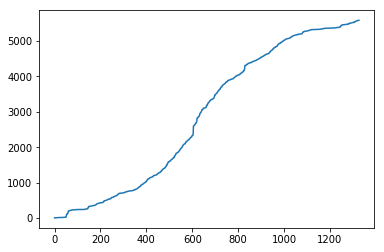

In [9]:
plt.plot(data['cummBugs'])
plt.show()

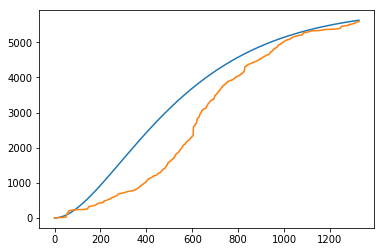

In [10]:
a = 5950
b = 0.0035
xs = np.arange(1327)
xs = a * (1 - (1 + b * xs) * np.exp(-b * xs))
plt.plot(xs)
plt.plot(data['cummBugs'])
plt.show()

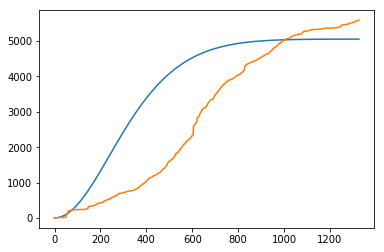

In [11]:
a = 8000
alpha = 1
beta = 0.00001
r = 1
t = np.arange(1327)
xs = a * (1 - np.exp(-r * alpha * (1 - np.exp(-beta * t ** 2 / 2))))
plt.plot(xs)
plt.plot(data['cummBugs'])
plt.show()

G-O S-shaped [  8.52256486e+03   1.86485536e-03] 106308245.876 True
Yamada Raleigh [  9.97583886e+08   1.83125349e-01   3.39283581e-05   3.05325897e-06] 53907262.5028 True
Gompertz [  6.03152061e+03   8.08154706e-04   9.96446783e-01] 28351423.6786 True


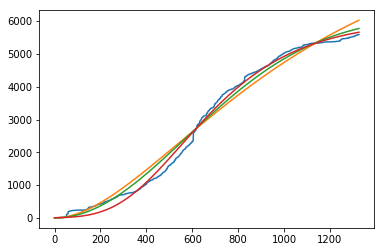

In [12]:
def go_s_shaped(t, a, b):
    '''G-O S-shaped model'''
    return a * (1 - (1 + b * t) * np.exp(-b * t))

def yamada_raleigh(t, a, r, alpha, beta):
    '''Yamada Raleigh model'''
    return a * (1 - np.exp(-r * alpha * (1 - np.exp(-beta * t ** 2 / 2))))

def gompertz(t, a, b, c):
    '''Gompertz model'''
    return a * (b ** (c ** t))

def fun1(params):
    '''objective function for G-O S-shaped model - sum of squares'''
    t = np.arange(len(data['cummBugs']))
    return ((data['cummBugs'] - go_s_shaped(t, params[0], params[1])) ** 2).sum() 

def fun2(params):
    '''objective function for Yamada Raleigh model - sum of squares'''
    t = np.arange(len(data['cummBugs']))
    return ((data['cummBugs'] - yamada_raleigh(t, params[0], params[1], params[2], params[3])) ** 2).sum() 

def fun3(params):
    '''objective function for Gompertz model - sum of squares'''
    t = np.arange(len(data['cummBugs']))
    return ((data['cummBugs'] - gompertz(t, params[0], params[1], params[2])) ** 2).sum() 

# get optimal parameters for G-O S-shaped model
go_res = minimize(fun1, [5950, 0.0035], method='Nelder-Mead')
print('G-O S-shaped', go_res.x, go_res.fun, go_res.success)

# get optimal parameters for Yamada Raleigh model
yam_res = minimize(fun2, [1e+09, 1.77295917e-01, 3.37923671e-05, 3.05325708e-06], method='Nelder-Mead')
print('Yamada Raleigh', yam_res.x, yam_res.fun, yam_res.success)

# get optimal parameters for Gompertz model
gpz_res = minimize(fun3, [6000, 0.001, 0.995], method='Nelder-Mead')
print('Gompertz', gpz_res.x, gpz_res.fun, gpz_res.success)

x = np.arange(len(data['cummBugs']))
xs1 = go_s_shaped(x, go_res.x[0], go_res.x[1])
xs2 = yamada_raleigh(x, yam_res.x[0], yam_res.x[1], yam_res.x[2], yam_res.x[3])
xs3 = gompertz(x, gpz_res.x[0], gpz_res.x[1], gpz_res.x[2])

plt.plot(data['cummBugs'])
plt.plot(xs1)
plt.plot(xs2)
plt.plot(xs3)
plt.show()

### Conclusion
Gompertz model shows best match (least sum of squares) with optimal parameters:

$$a = 6.03152064e+03,$$ $$b = 8.08154454e-04,$$ $$c = 9.96446783e-01$$

In [13]:
a, b, c = (6.03152061e+03, 8.08154706e-04, 9.96446783e-01)

B = 1000
X = data['bugsPerDay']
gen = np.random.choice(X, size=(B, len(X)))

parameters = []

for sample in gen:
    cummBugs = np.cumsum(sample)
    
    def obj_func(params):
        t = np.arange(len(cummBugs))
        return ((cummBugs - gompertz(t, params[0], params[1], params[2])) ** 2).sum()
    
    parameters.append(minimize(obj_func, [a, b, c], method='Nelder-Mead').x)

parameters = np.array(parameters)
estimation = parameters.mean(axis=0)
conf_int = np.percentile(parameters, [2.5, 97.5], axis=0)
print('params', estimation, '\nfrom  ', conf_int[0], '\nto    ', conf_int[1])
    

params [  7.52407919e+03   4.50883920e-02   9.98258299e-01] 
from   [  6.26066583e+03   3.04048998e-02   9.97855428e-01] 
to     [  9.63603464e+03   6.24138584e-02   9.98661574e-01]
